<a href="https://colab.research.google.com/github/gitmav1-eq/Sales_Analysis_e-commerce-store/blob/main/Sales_Analysis_e_commerce_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "/content/Assignment - Analytics Intern - Airlearn.xlsx"
df = pd.read_excel(file_path, sheet_name='sales_data_500')

In [4]:
# Data Cleaning & Validation#
df['Quantity Sold'] = pd.to_numeric(df['Quantity Sold'], errors='coerce')
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

In [5]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

In [8]:
#Revenue Analysis #
# Total revenue per product category
category_revenue = df.groupby('Product Category')['Total Revenue'].sum().reset_index()

In [9]:
# Top 5 best-selling products
top_products = df.groupby('Product Name')['Total Revenue'].sum().nlargest(5).reset_index()

In [10]:
# Payment method generating highest revenue
payment_revenue = df.groupby('Payment Method')['Total Revenue'].sum().reset_index()

In [11]:
# Customer Insights #
# Top 3 customers by total spend
top_customers = df.groupby('Customer Name')['Total Revenue'].sum().nlargest(3).reset_index()

In [12]:
# Unique customers count
unique_customers = df['Customer Name'].nunique()

In [13]:
# Customers making multiple purchases on the same day
multi_purchases = df.groupby(['Customer Name', 'Date']).size().reset_index(name='Purchase Count')
multi_purchases = multi_purchases[multi_purchases['Purchase Count'] > 1]

In [15]:
# Delivery Performance #
# Percentage of each delivery status
delivery_counts = df['Delivery Status'].value_counts(normalize=True) * 100

In [23]:
# Dashboard Creation  #
with pd.ExcelWriter("Processed_Airlearn_Data.xlsx", engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Cleaned_Data', index=False)
    category_revenue.to_excel(writer, sheet_name='Revenue_Analysis', index=False)
    top_products.to_excel(writer, sheet_name='Top_Products', index=False)
    payment_revenue.to_excel(writer, sheet_name='Payment_Revenue', index=False)
    top_customers.to_excel(writer, sheet_name='Top_Customers', index=False)
    multi_purchases.to_excel(writer, sheet_name='Multi_Purchases', index=False)
    delivery_counts.to_excel(writer, sheet_name='Delivery_Performance', index=True)

In [26]:
 # Summary Dashboard Sheet
summary_df = pd.DataFrame({
        'Metric': ['Total Revenue', 'Top 1 Product', 'Top 2 Product', 'Top 3 Product'],
        'Value': [df['Total Revenue'].sum(), top_products.iloc[0, 0], top_products.iloc[1, 0], top_products.iloc[2, 0]]
    })
summary_df.to_excel(writer, sheet_name='Dashboard', index=False)

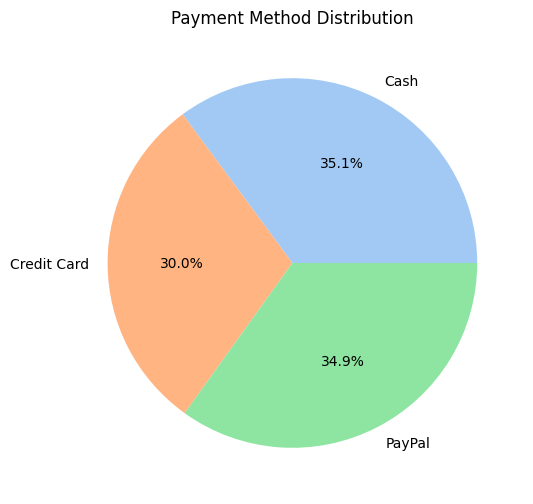

In [28]:
 # Generate and Save Pie Chart for Payment Methods
plt.figure(figsize=(6, 6))
plt.pie(payment_revenue['Total Revenue'], labels=payment_revenue['Payment Method'], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Payment Method Distribution')
plt.savefig('payment_methods.png')

<ipython-input-30-cc982ac1b556>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_revenue, x='Product Category', y='Total Revenue', palette='Blues')


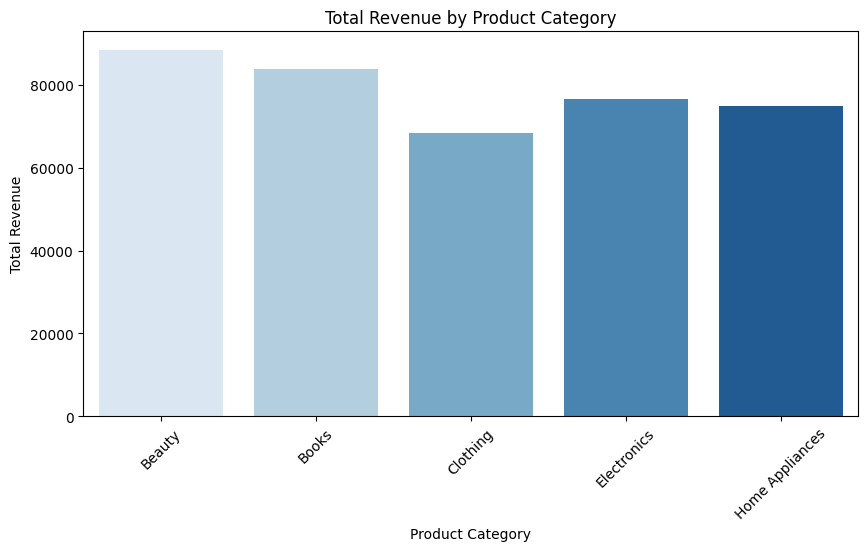

In [30]:
# Generate and Save Bar Chart for Sales per Product Category
plt.figure(figsize=(10, 5))
sns.barplot(data=category_revenue, x='Product Category', y='Total Revenue', palette='Blues')
plt.xticks(rotation=45)
plt.title('Total Revenue by Product Category')
plt.savefig('category_revenue.png')

In [32]:
# Generate and Save Bar Chart for Top 5 Best-Selling Products
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, x='Product Name', y='Total Revenue', palette='Greens')
plt.xticks(rotation=45)
plt.title('Top 5 Best-Selling Products')
plt.savefig('top_products.png')
plt.close()

<ipython-input-32-1ba7860dacc9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Product Name', y='Total Revenue', palette='Greens')


In [33]:
# Generate and Save Pie Chart for Delivery Status Distribution
plt.figure(figsize=(6, 6))
plt.pie(delivery_counts, labels=delivery_counts.index, autopct='%1.1f%%', colors=sns.color_palette("muted"))
plt.title('Delivery Status Distribution')
plt.savefig('delivery_status.png')
plt.close()

In [34]:
print("Processing completed. Data saved in Processed_Airlearn_Data.xlsx")

Processing completed. Data saved in Processed_Airlearn_Data.xlsx
